## What is Gaia 

Gaia is a space observatory of the European Space Agency, launched in 2013 and expected to operate until 2025. The spacecraft is designed for astrometry: measuring the positions, distances and motions of stars with unprecedented precision. Gaia provides astrometry, photometry, and spectroscopy of more than 1000 million stars in the Milky Way. Also data for significant samples of extragalactic and Solar system objects is made available. The Gaia Archive contains deduced positions, parallaxes, proper motions, radial velocities, and brightnesses. Complementary information on multiplicity, photometric variability, and astrophysical parameters is provided for a large fraction of sources.

## Gaia Data

Gaia Data primarily contains of - Right Ascension (RA), Declination (Dec), Parallax, Radial Velocity (RV), Proper Motion in terms of Right Ascension (pmra), and Proper Motion in terms of Declination (pmdec).

## Gaia Archive

Gaia Archive is a remote server which hosts the publicly available Dsta Releases of Gaia in the form of a database. It also provides us an interface to query the data and manipulate it according to our needs on the server itself, without us having the need to download the data first on our local computers. Using the Gaia archive site, we can get data on the positions, brightnesses, distances, and more for millions of stars and do various kinds of science and data visualization from them.

The Gaia archive can be found here: https://gea.esac.esa.int/archive/

In [1]:
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [3]:
pip install astroquery

Note: you may need to restart the kernel to use updated packages.


In [6]:
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier

In [7]:
## Making a Gaia cone_search of 20 m radius around M45 center

coordinate = coord.SkyCoord.from_name("M45")
print(coordinate)
radius = u.Quantity(1, u.deg)/3
Gaia.ROW_LIMIT = -1
j = Gaia.cone_search_async(coordinate, radius, table_name = "gaiadr3.gaia_source")
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (56.601, 24.114)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [8]:
type(r)

astropy.table.table.Table

In [9]:
r

solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,dist
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / um,1 / um,1 / um,,,,,,,,mas,,,,,deg,,,,,,,,deg,deg,deg,deg,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,,,,,mag,mag,mag,km / s,km / s,,,,,,,,d,km / s,K,log(cm.s**-2),dex,,km / s,km / s,,mag,mag,,,,deg,deg,deg,deg,,,,,,,,,,,,,,,K,K,K,log(cm.s**-2),log(cm.s**-2),log(cm.s**-2),dex,dex,dex,pc,pc,pc,mag,mag,mag,mag,mag,mag,mag,mag,mag,,
int64,object,int64,int64,float64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,int16,bool,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,int16,int16,int16,float32,float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bool,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,int16,float64,float32,float32,float32,float32,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,fl

In [10]:
m45 = pd.read_csv("m45.csv")

In [11]:
print("(Rows, Columns) =", m45.shape)
m45.head()

(Rows, Columns) = (2000, 11)


,source_id,ra,dec,parallax,parallax_error,pmra,pmdec,phot_g_mean_mag,bp_rp,dr2_radial_velocity,dr2_radial_velocity_error
0,66709878719065856,56.946202,24.006479,0.648265,0.321356,9.303183,-3.013365,19.106915,1.869352,NaN,NaN
1,66709878719066112,56.939443,24.009120,2.736783,0.835917,11.813127,-9.264150,20.256937,1.564932,NaN,NaN
2,66709878719066752,56.940071,24.016597,1.157773,0.065585,4.607895,-3.882651,16.557972,1.350164,NaN,NaN
3,66709913078804992,56.922864,24.014981,1.744764,0.305856,-5.778770,-3.385706,18.990620,2.771936,NaN,NaN
4,66709917373682048,56.923808,24.009331,-0.596421,0.595128,0.029927,-0.712863,19.852995,1.062414,NaN,NaN


In [12]:
## save the ASCII table as a pandas dataframe
all_stars = r.to_pandas()
all_stars
type(all_stars)

pandas.core.frame.DataFrame

In [17]:
all_stars

,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,dist
0,1636148068921376768,Gaia DR3 65225091345088128,65225091345088128,816344951,2016.0,56.599638,0.371788,24.107784,0.289140,1.002419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.006338
1,1636148068921376768,Gaia DR3 65225130001307776,65225130001307776,218167495,2016.0,56.607920,15.120778,24.115292,8.427679,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.006440
2,1636148068921376768,Gaia DR3 65225095641479808,65225095641479808,1257006833,2016.0,56.603196,0.065966,24.105173,0.052051,0.848391,...,0.6053,0.6652,0.4715,0.4478,0.4929,0.2500,0.2376,0.2611,PHOENIX,0.009047
3,1636148068921376768,Gaia DR3 65225198720692736,65225198720692736,132819520,2016.0,56.593645,0.019683,24.122139,0.015432,4.983372,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.010558
4,1636148068921376768,Gaia DR3 65225125704831360,65225125704831360,1288068835,2016.0,56.612495,0.319137,24.111788,0.257095,0.146353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.010714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,1636148068921376768,Gaia DR3 65275501377570688,65275501377570688,1560680399,2016.0,56.275511,0.534760,24.265007,0.394080,1.458941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.333112
2923,1636148068921376768,Gaia DR3 65192209075189248,65192209075189248,168778942,2016.0,56.336030,0.858277,23.885156,0.586425,-0.778615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.333116
2924,1636148068921376768,Gaia DR3 65268973027302656,65268973027302656,1096432161,2016.0,56.236885,0.015729,24.090826,0.011904,0.258332,...,1.5119,1.5270,1.1535,1.1467,1.1589,0.6141,0.6103,0.6172,MARCS,0.333185
2925,1636148068921376768,Gaia DR3 65275501377570816,65275501377570816,1308251547,2016.0,56.275505,86.781815,24.265257,45.760345,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.333231


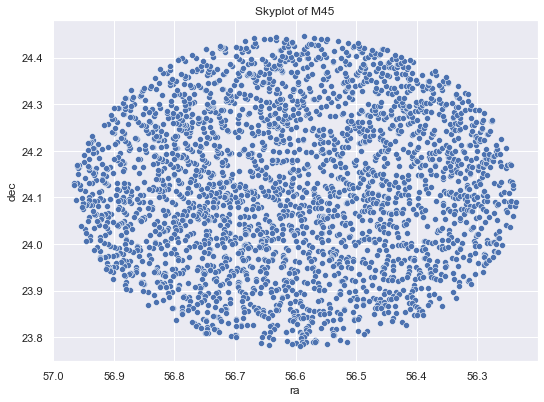

In [13]:
## Plotting the Skyplot

sns.set(rc={"figure.figsize": (8.7,6.27)})
skyplot = sns.scatterplot(x = "ra", y = "dec", data = all_stars)
skyplot.invert_xaxis()
plt.title("Skyplot of M45")
plt.show()

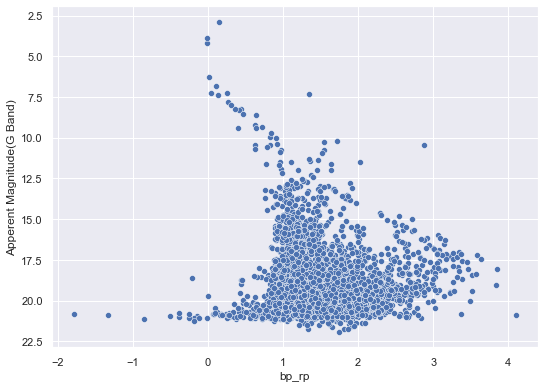

In [16]:
sns.scatterplot(x = "bp_rp", y = "phot_g_mean_mag", palette = "RdY1Gn",
                data = all_stars)
plt.ylabel("Apperent Magnitude(G Band)")
#plt.show()
plt.gca().invert_yaxis()

(-60.0, 30.0)

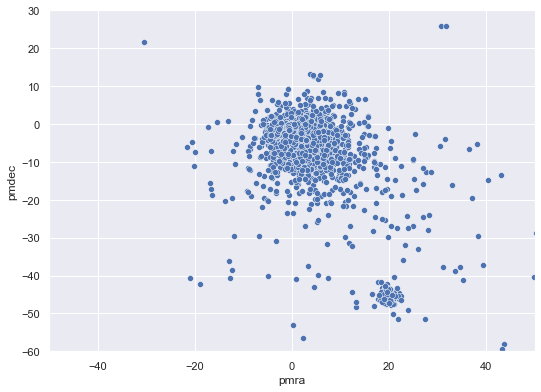

In [19]:
sns.set(rc = {"figure.figsize": (8.7, 6.27)})

sns.scatterplot(x ="pmra", y = "pmdec", data = all_stars)
plt.xlim([-50,50])
plt.ylim([-60,30])

<AxesSubplot:xlabel='pmra', ylabel='parallax'>

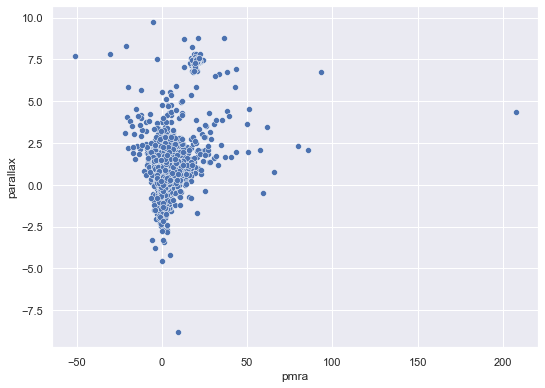

In [20]:
sns.scatterplot(x = "pmra", y = "parallax", data = all_stars)

(-70.0, 40.0)

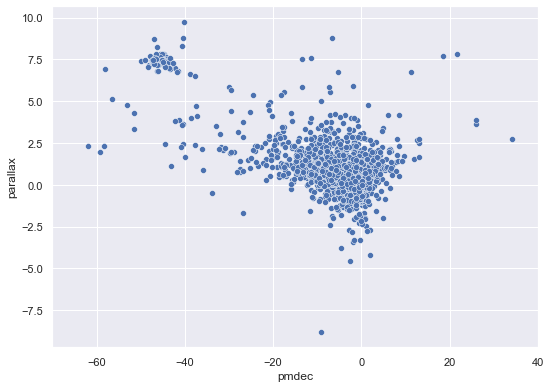

In [22]:
sns.scatterplot(x = "pmdec", y = "parallax", data = all_stars)
plt.xlim([-70,40])

<AxesSubplot:xlabel='parallax', ylabel='Count'>

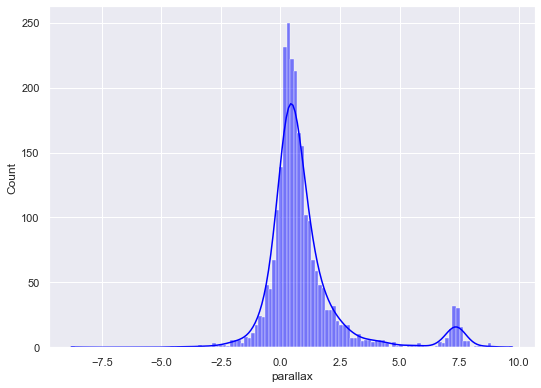

In [23]:
sns.histplot(x = "parallax", data = all_stars, kde = True, color = "blue")

(-25.0, 50.0)

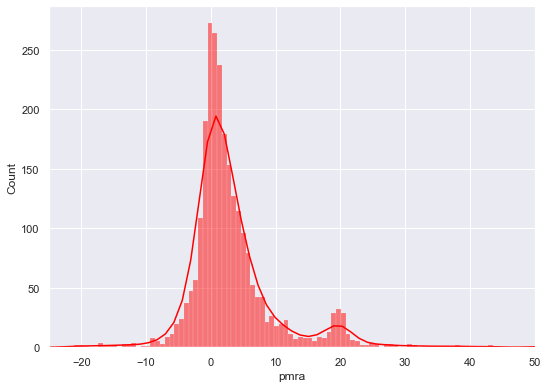

In [27]:
sns.histplot(x = "pmra", data = all_stars, kde = True, color = "red")
plt.xlim([-25,50])

(-60.0, 20.0)

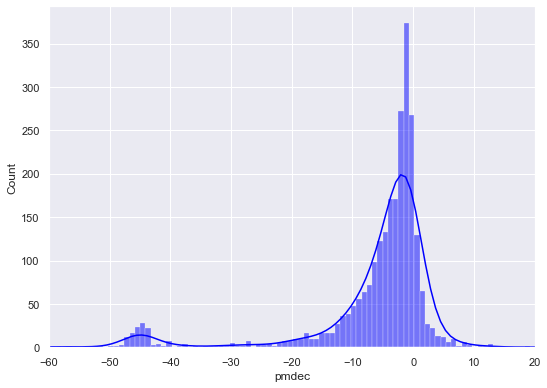

In [28]:
sns.histplot(x = "pmdec", data = all_stars, kde = True, color = "blue")
plt.xlim([-60,20])

In [29]:
all_stars.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,dist
count,2.927000e+03,2.927000e+03,2.927000e+03,2927.0,2927.000000,2927.000000,2927.000000,2927.000000,2553.000000,2553.000000,...,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,2927.000000
mean,1.636148e+18,6.563266e+16,9.118133e+08,2016.0,56.605572,1.136734,24.122601,0.810931,1.006198,0.448121,...,0.444942,0.406904,0.495982,0.330996,0.302219,0.370290,0.186655,0.170642,0.208247,0.218650
std,0.000000e+00,6.642450e+14,5.304276e+08,0.0,0.182177,3.480475,0.162365,2.423838,1.775541,0.448333,...,0.456021,0.450445,0.458578,0.330808,0.327392,0.332108,0.189694,0.187475,0.190450,0.079226
min,1.636148e+18,6.519193e+16,5.469950e+05,2016.0,56.236885,0.012181,23.781850,0.008992,-8.791216,0.014245,...,0.001200,0.000100,0.003300,0.000900,0.000100,0.002800,0.000500,0.000000,0.001500,0.006338
25%,1.636148e+18,6.521550e+16,4.489656e+08,2016.0,56.456765,0.118823,23.995399,0.085056,0.180700,0.114601,...,0.023550,0.005700,0.061575,0.018100,0.004400,0.048200,0.009800,0.002375,0.026150,0.159612
50%,1.636148e+18,6.523080e+16,9.138771e+08,2016.0,56.610093,0.330569,24.119591,0.235462,0.577512,0.287605,...,0.343000,0.271350,0.417650,0.264050,0.205900,0.329300,0.142700,0.112000,0.178050,0.231972
75%,1.636148e+18,6.671133e+16,1.370203e+09,2016.0,56.750508,0.829884,24.254645,0.582078,1.197278,0.632647,...,0.750450,0.713450,0.794500,0.569650,0.543675,0.605325,0.320075,0.305425,0.338575,0.284190
max,1.636148e+18,6.678503e+16,1.811449e+09,2016.0,56.965469,86.781815,24.446309,53.509377,9.743848,3.483384,...,2.982800,2.963800,2.997800,2.245500,2.229000,2.258300,1.252500,1.243200,1.259600,0.333257


In [30]:
mask = (all_stars.parallax >= 6) & (all_stars.parallax <= 8.5) & (all_stars.pmra < 30) & (all_stars.pmra > 10) & (all_stars.pmdec > -50) & (all_stars.pmdec < -40)

In [31]:
members = all_stars[mask]

In [32]:
members.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,...,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,dist
count,1.080000e+02,1.080000e+02,1.080000e+02,108.0,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,108.000000
mean,1.636148e+18,6.567517e+16,1.012635e+09,2016.0,56.630338,0.135999,24.115347,0.095344,7.363813,0.152292,...,0.888030,0.858169,0.915397,0.575871,0.556856,0.593419,0.372002,0.359705,0.383305,0.218307
std,0.000000e+00,6.885208e+14,5.465029e+08,0.0,0.176697,0.193565,0.164836,0.130602,0.232411,0.212373,...,0.521526,0.513763,0.526996,0.318257,0.315020,0.320177,0.212273,0.209187,0.214279,0.076151
min,1.636148e+18,6.519998e+16,4.198555e+06,2016.0,56.277338,0.012181,23.787510,0.008992,6.737442,0.014245,...,0.004600,0.001200,0.012700,0.004000,0.001000,0.010900,0.002200,0.000500,0.006000,0.026672
25%,1.636148e+18,6.521410e+16,5.014678e+08,2016.0,56.475728,0.033905,23.992178,0.024575,7.231722,0.037741,...,0.590075,0.559725,0.640525,0.391825,0.353975,0.435250,0.246500,0.234425,0.258750,0.158461
50%,1.636148e+18,6.522910e+16,1.050352e+09,2016.0,56.638711,0.084352,24.103659,0.063056,7.364441,0.096587,...,0.916750,0.867150,0.936800,0.574200,0.550300,0.590500,0.385350,0.368800,0.391700,0.234661
75%,1.636148e+18,6.671459e+16,1.481213e+09,2016.0,56.789979,0.154463,24.254666,0.107203,7.491463,0.167927,...,1.165175,1.132300,1.217200,0.741775,0.725650,0.767025,0.502800,0.485250,0.525350,0.273122
max,1.636148e+18,6.678245e+16,1.808283e+09,2016.0,56.943379,1.604912,24.433739,1.070261,8.231177,1.701455,...,2.298100,2.261700,2.337300,1.379200,1.350100,1.393100,0.938700,0.919600,0.946700,0.332050


<AxesSubplot:xlabel='pmdec', ylabel='Count'>

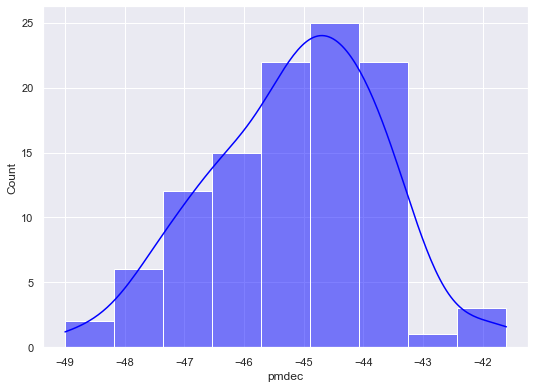

In [33]:
sns.histplot( x = "pmdec", data = members, kde = True, color = "blue")

In [34]:
members

,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,dist
17,1636148068921376768,Gaia DR3 65226401312036864,65226401312036864,794693112,2016.0,56.630027,0.111463,24.117141,0.093256,7.393074,...,1.6774,1.7501,1.2744,1.2468,1.3041,0.6897,0.6746,0.7061,MARCS,0.026672
22,1636148068921376768,Gaia DR3 65224889481112832,65224889481112832,1268966677,2016.0,56.608796,0.462524,24.085812,0.390092,7.572114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.029067
63,1636148068921376768,Gaia DR3 65229734206151680,65229734206151680,227615435,2016.0,56.605873,0.063788,24.159919,0.049626,7.190575,...,0.8429,0.8651,0.5634,0.5539,0.5687,0.3508,0.3448,0.3540,MARCS,0.046136
97,1636148068921376768,Gaia DR3 65225611037551360,65225611037551360,1097700054,2016.0,56.663990,0.017479,24.102995,0.015164,7.360922,...,0.0028,0.0185,0.0079,0.0024,0.0160,0.0043,0.0013,0.0087,MARCS,0.058531
155,1636148068921376768,Gaia DR3 65224442806459008,65224442806459008,1284141085,2016.0,56.553723,0.014955,24.054171,0.012504,7.332498,...,0.6321,0.6521,0.4642,0.4560,0.4707,0.2512,0.2468,0.2547,MARCS,0.073775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816,1636148068921376768,Gaia DR3 65208396808627840,65208396808627840,1782901585,2016.0,56.922764,0.015220,23.971728,0.011432,7.367580,...,0.9793,1.0015,0.7561,0.7487,0.7663,0.4057,0.4016,0.4112,MARCS,0.326469
2877,1636148068921376768,Gaia DR3 65199978672758272,65199978672758272,1729653682,2016.0,56.657097,0.017948,23.787510,0.014423,7.471863,...,0.0059,0.0290,0.0176,0.0048,0.0239,0.0094,0.0025,0.0128,PHOENIX,0.330487
2880,1636148068921376768,Gaia DR3 65275501377570944,65275501377570944,689917450,2016.0,56.277338,0.162854,24.263309,0.123545,6.834920,...,0.1370,0.1576,0.1294,0.1227,0.1413,0.0692,0.0656,0.0756,PHOENIX,0.330860
2887,1636148068921376768,Gaia DR3 66734514652754688,66734514652754688,1560405495,2016.0,56.824750,1.604912,24.375293,1.070261,7.577743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.331504


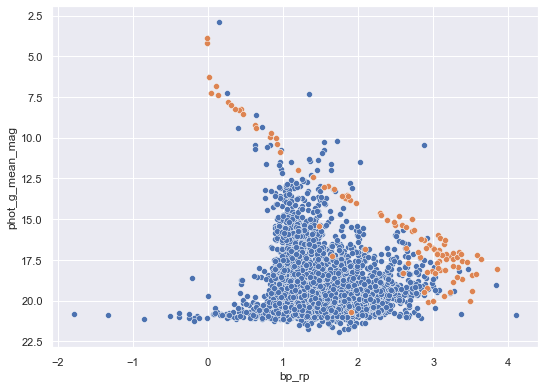

In [35]:
sns.scatterplot(x = "bp_rp", y = "phot_g_mean_mag", palette = "RdY1Gn", data = all_stars)
sns.scatterplot(x = "bp_rp", y = "phot_g_mean_mag", palette = "RdY1Gn", data = members)
plt.gca().invert_yaxis()

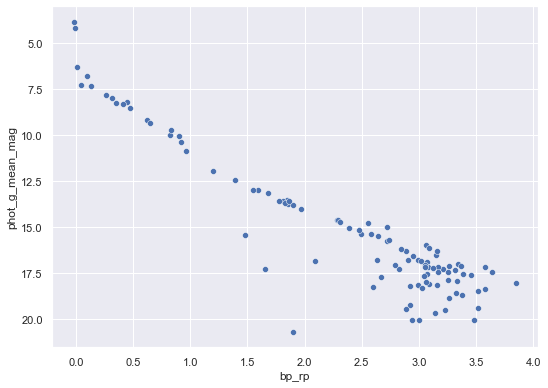

In [36]:
sns.scatterplot(x = "bp_rp", y = "phot_g_mean_mag", palette = "RdY1Gn", data = members)
plt.gca().invert_yaxis()

In [37]:
mask2=(members.parallax_over_error >= 3) & (members.pmra_error < 1) & (members.pmdec_error < 1) & (members.ruwe < 1.4) & (all_stars.parallax >= 6) & (all_stars.parallax <= 9) &(all_stars.pmra < 30) & (all_stars.pmra > 10)& (all_stars.pmdec > -50) & (all_stars.pmdec < -40)

In [38]:
members2 = members[mask2]

C:\Users\User\AppData\Local\Temp\ipykernel_14924\119343640.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  members2 = members[mask2]


In [39]:
members2

,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,dist
22,1636148068921376768,Gaia DR3 65224889481112832,65224889481112832,1268966677,2016.0,56.608796,0.462524,24.085812,0.390092,7.572114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.029067
97,1636148068921376768,Gaia DR3 65225611037551360,65225611037551360,1097700054,2016.0,56.663990,0.017479,24.102995,0.015164,7.360922,...,0.0028,0.0185,0.0079,0.0024,0.0160,0.0043,0.0013,0.0087,MARCS,0.058531
155,1636148068921376768,Gaia DR3 65224442806459008,65224442806459008,1284141085,2016.0,56.553723,0.014955,24.054171,0.012504,7.332498,...,0.6321,0.6521,0.4642,0.4560,0.4707,0.2512,0.2468,0.2547,MARCS,0.073775
187,1636148068921376768,Gaia DR3 65230764996027776,65230764996027776,1204621712,2016.0,56.566777,0.030415,24.189728,0.021397,7.399227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.081920
196,1636148068921376768,Gaia DR3 65223515093523328,65223515093523328,131180461,2016.0,56.597871,0.066721,24.030747,0.060405,7.373005,...,1.0305,1.0694,0.6469,0.6344,0.6586,0.4465,0.4385,0.4541,MARCS,0.083299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,1636148068921376768,Gaia DR3 65282098447322752,65282098447322752,1164646792,2016.0,56.353360,0.052395,24.345770,0.039073,6.975272,...,1.1332,1.1652,0.7289,0.7183,0.7389,0.4813,0.4746,0.4874,MARCS,0.323603
2795,1636148068921376768,Gaia DR3 66735446661374976,66735446661374976,658462074,2016.0,56.782902,0.100975,24.393665,0.068864,7.034788,...,1.3165,1.3930,0.8462,0.8214,0.8699,0.5595,0.5443,0.5739,MARCS,0.325140
2816,1636148068921376768,Gaia DR3 65208396808627840,65208396808627840,1782901585,2016.0,56.922764,0.015220,23.971728,0.011432,7.367580,...,0.9793,1.0015,0.7561,0.7487,0.7663,0.4057,0.4016,0.4112,MARCS,0.326469
2877,1636148068921376768,Gaia DR3 65199978672758272,65199978672758272,1729653682,2016.0,56.657097,0.017948,23.787510,0.014423,7.471863,...,0.0059,0.0290,0.0176,0.0048,0.0239,0.0094,0.0025,0.0128,PHOENIX,0.330487


Text(0, 0.5, 'Apperent Magnitude(G Band)')

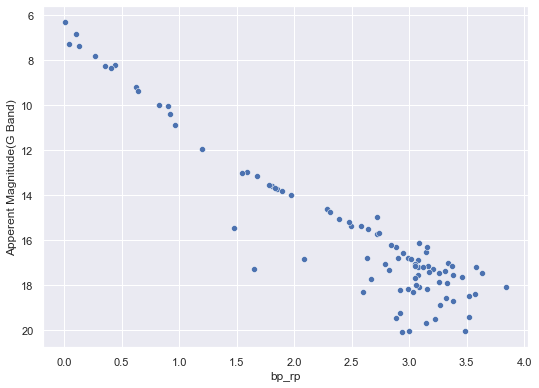

In [42]:
sns.scatterplot(x = "bp_rp", y = "phot_g_mean_mag", palette = "RdY1Gn", data = members2)
plt.gca().invert_yaxis()
plt.ylabel("Apperent Magnitude(G Band)")

In [43]:
closest100 = pd.read_csv("closest_100.csv")

In [44]:
closest100

,source_id,ra,ra_error,dec,dec_error,parallax,parallax_error
0,4062964299525805952,272.237829,1.276152,-27.645916,0.830618,1851.882140,1.285094
1,4065202424204492928,274.906872,1.251748,-25.255882,1.571499,1847.433349,1.874937
2,4051942623265668864,276.223193,0.682959,-27.140479,0.500750,1686.265958,1.473535
3,4048978992784308992,273.112421,1.092637,-31.184670,1.362824,1634.283354,1.971231
4,4059168373166457472,259.297177,1.640748,-30.486547,2.069445,1513.989051,2.868580
...,...,...,...,...,...,...,...
95,4049284794374737536,272.676884,1.471668,-30.365627,1.304796,635.891449,1.723768
96,4038950244078680832,271.127604,1.478231,-35.445585,1.384748,632.099183,1.699712
97,4048896666737862656,273.411919,1.164029,-31.807867,0.961718,628.383496,1.281465
98,4048767474113708160,272.760347,0.980236,-32.282528,1.203943,627.809905,2.083120
